In [33]:
import os 
import openslide
import cv2
import numpy as np
import time
from xml.etree.ElementTree import parse
import matplotlib.pyplot as plt

def get_ROI_mask(slide, xml):

    if slide.level_count < 4:
        level_index = slide.level_count-1
    else:
        level_index = 3

    slide_thumbnail = slide.get_thumbnail(slide.level_dimensions[level_index])
    slide_thumbnail = slide_thumbnail.convert('RGB')

    mask_slide_ratio = round(slide.level_downsamples[level_index])

    annotations = []
    patterns = []

    for anno in xml.iter('Annotation'):
        pattern = anno.get('class')
        patterns.append(pattern)
        annotation = []
        for i, coors in enumerate(anno):
            if i == 0: 
                continue
            coordinates = []
            for coor in coors:
                coordinates.append([round(float(coor.get('x'))//mask_slide_ratio), round(float(coor.get('y'))//mask_slide_ratio)])

            annotation.append(coordinates)

        annotations.append(annotation)

    width, height = slide.level_dimensions[level_index]
    ROI_mask = np.zeros((height, width)).astype(np.uint8)

    for anno in annotations:
        _anno = []
        for coors in anno:
            _anno.append(np.array(coors))

        cv2.drawContours(ROI_mask, _anno, -1, 255, -1)

    return slide_thumbnail, ROI_mask

slide_dir = '/mnt/nfs0/jycho/SLIDE_DATA/록원재단/AT2/C-MET_slide'
ROI_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/ROI_annotation' 
plot_save_dir = '/mnt/hdd1/c-MET_datasets/SLIDE_DATA/ROI_annotation/check'

issues = [118]

os.makedirs(plot_save_dir, exist_ok = True)

slide_list = sorted([svs for svs in os.listdir(slide_dir) if 'svs' in svs and int(svs.split('-')[1][2:]) not in issues])
ROI_list = sorted([xml for xml in os.listdir(ROI_dir) if 'xml' in xml])

total_time = 0
for i, (slide_file, ROI_file) in enumerate(zip(slide_list, ROI_list)):
    start_time = time.time()
    
    if slide_file[:-4] != ROI_file[:-4]:
        print("Check the pairness between slide and ROI annotation")
        break

    if i == len(ROI_list)-1:
    
    slide_name = slide_file[:-4]
    slide_path = os.path.join(slide_dir, slide_file)
    ROI_path = os.path.join(ROI_dir, ROI_file)

    slide = openslide.OpenSlide(slide_path)
    ROI = parse(ROI_path).getroot()
    
    slide_thumbnail, ROI_mask = get_ROI_mask(slide, ROI)
    slide = np.array(slide_thumbnail)

    plt.figure(figsize=(30, 20))
    plt.imshow(slide)
    plt.imshow(ROI_mask, alpha = 0.3)
    plt.savefig(f'{plot_save_dir}/{slide_name}_ROI_overlay.jpg', bbox_inches = 'tight')
    plt.close()

    end_time = time.time()
    taken = end_time - start_time
    print(f'{slide_name} | size: {ROI_mask.shape} | time: {round(taken, 2)} sec')
    total_time += taken

print(f'total time: {round(total_time, 2)} sec')

S-LC0001-MET | size: (1750, 3672) | time: 3.41 sec
S-LC0002-MET | size: (1730, 4046) | time: 3.74 sec
S-LC0003-MET | size: (2540, 3859) | time: 5.25 sec
S-LC0004-MET | size: (2041, 2427) | time: 3.22 sec
S-LC0005-MET | size: (1567, 996) | time: 1.18 sec
S-LC0006-MET | size: (885, 2209) | time: 1.5 sec
S-LC0007-MET | size: (1486, 2739) | time: 2.6 sec
S-LC0008-MET | size: (1453, 2521) | time: 2.44 sec
S-LC0009-MET | size: (824, 2241) | time: 1.41 sec
S-LC0010-MET | size: (900, 2116) | time: 1.48 sec
S-LC0011-MET | size: (1243, 2552) | time: 2.04 sec
S-LC0012-MET | size: (1037, 2521) | time: 1.74 sec
S-LC0013-MET | size: (1375, 2521) | time: 2.31 sec
S-LC0014-MET | size: (1469, 2521) | time: 2.43 sec
S-LC0015-MET | size: (1395, 2365) | time: 2.31 sec
S-LC0016-MET | size: (839, 2085) | time: 1.39 sec
S-LC0017-MET | size: (1522, 2645) | time: 2.56 sec
S-LC0018-MET | size: (1454, 2334) | time: 2.41 sec
S-LC0019-MET | size: (1195, 2272) | time: 1.89 sec
S-LC0020-MET | size: (1440, 3672) | ti

In [63]:
for i, (slide_file, ROI_file) in enumerate(zip(slide_list, ROI_list)):
    start_time = time.time()
    if i == len(ROI_list)-1:
    
        slide_name = slide_file[:-4]
        slide_path = os.path.join(slide_dir, slide_file)
        ROI_path = os.path.join(ROI_dir, ROI_file)

        slide = openslide.OpenSlide(slide_path)
        ROI = parse(ROI_path).getroot()
        
        slide_thumbnail, ROI_mask = get_ROI_mask(slide, ROI)
        slide = np.array(slide_thumbnail)

        # plt.figure(figsize=(30, 20))
        # plt.imshow(slide)
        # plt.imshow(ROI_mask, alpha = 0.3)
        # plt.savefig(f'{plot_save_dir}/{slide_name}_ROI_overlay.jpg', bbox_inches = 'tight')
        # plt.close()

        end_time = time.time()
        taken = end_time - start_time
        print(f'{slide_name} | size: {ROI_mask.shape} | time: {round(taken, 2)} sec')
        total_time += taken

S-LC0122-MET | size: (1448, 2427) | time: 0.64 sec


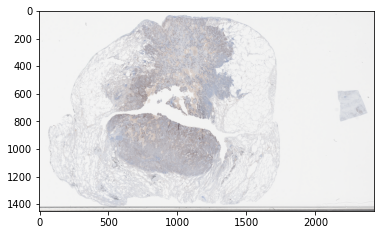

In [64]:
plt.imshow(slide)

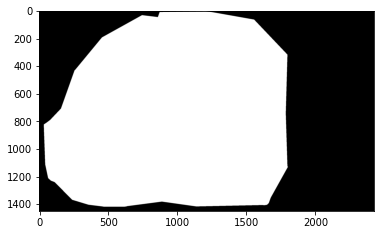

In [65]:
plt.imshow(ROI_mask, cmap = 'gray')

In [133]:
otsu_image = cv2.cvtColor(slide, cv2.COLOR_BGR2HSV)

otsu_image_1 = otsu_image[:, :, 1]
otsu_image_2 = 1 - otsu_image[:, :, 2]

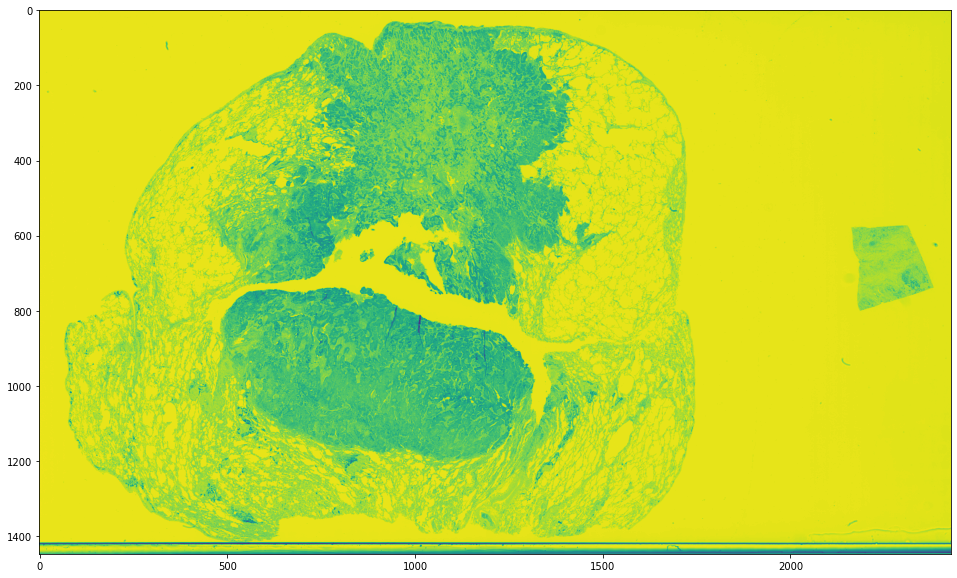

In [134]:
plt.figure(figsize= (20, 10))
plt.imshow(cv2.cvtColor(slide, cv2.COLOR_RGB2GRAY))
plt.show()

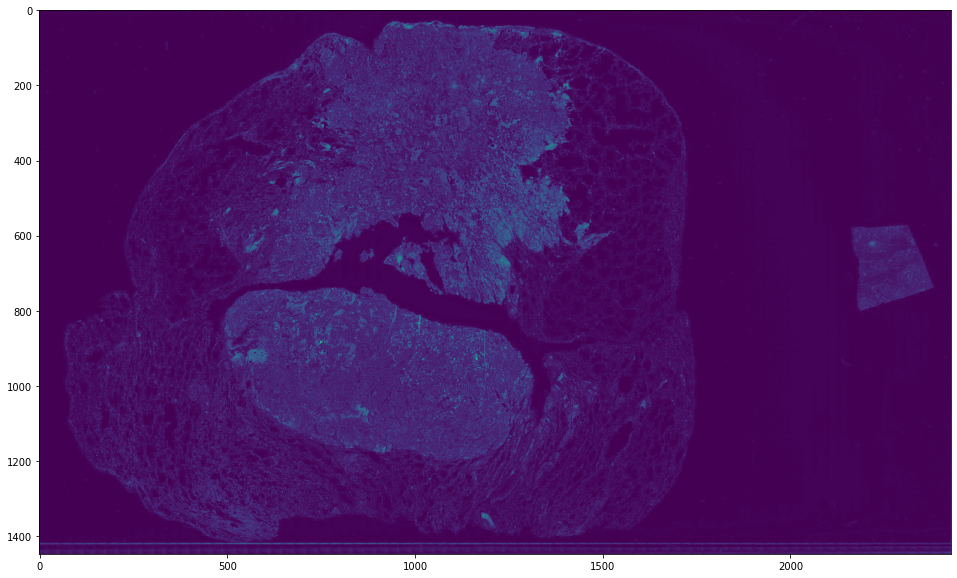

In [135]:
plt.figure(figsize= (20, 10))
plt.imshow(otsu_image_1)
plt.show()

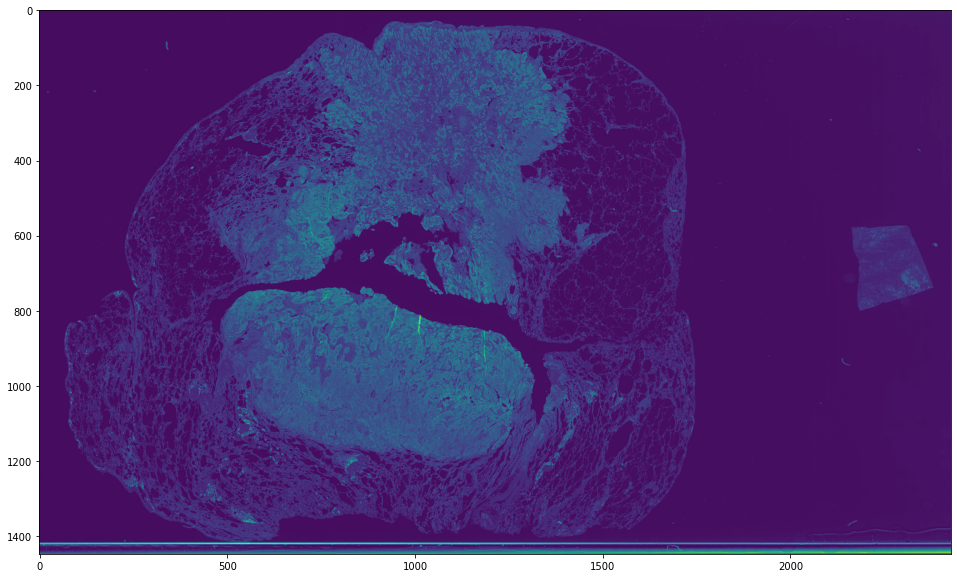

In [136]:

plt.figure(figsize= (20, 10))
plt.imshow(otsu_image_2)
plt.show()

In [117]:
cv2.bitwise_and(np.array([255, 0, 255], dtype ='uint8'), np.array([123, 3, 2], dtype ='uint8'))

array([[123],
       [  0],
       [  2]], dtype=uint8)

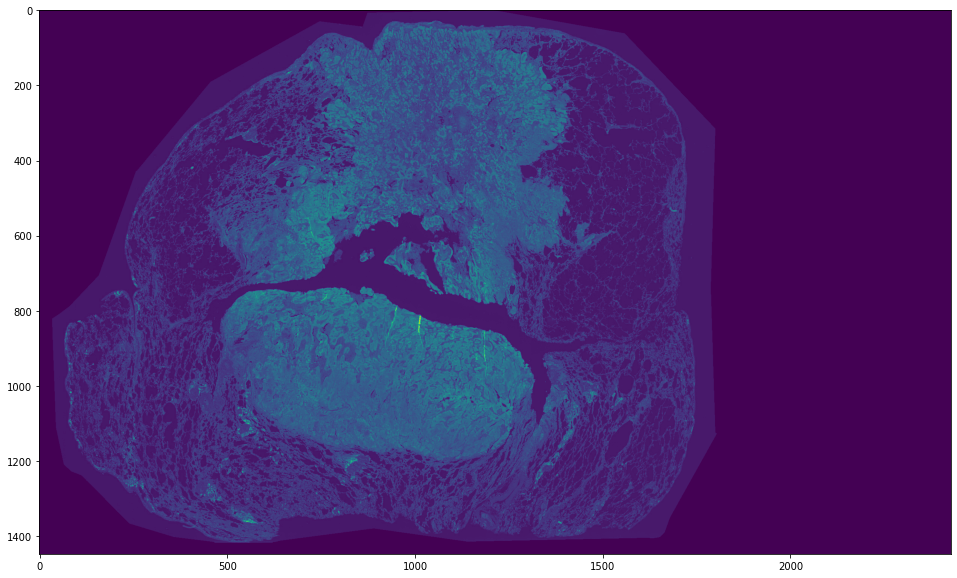

In [138]:
test = cv2.bitwise_and(otsu_image_2, otsu_image_2, mask = ROI_mask)

plt.figure(figsize= (20, 10))
plt.imshow(test)
plt.show()

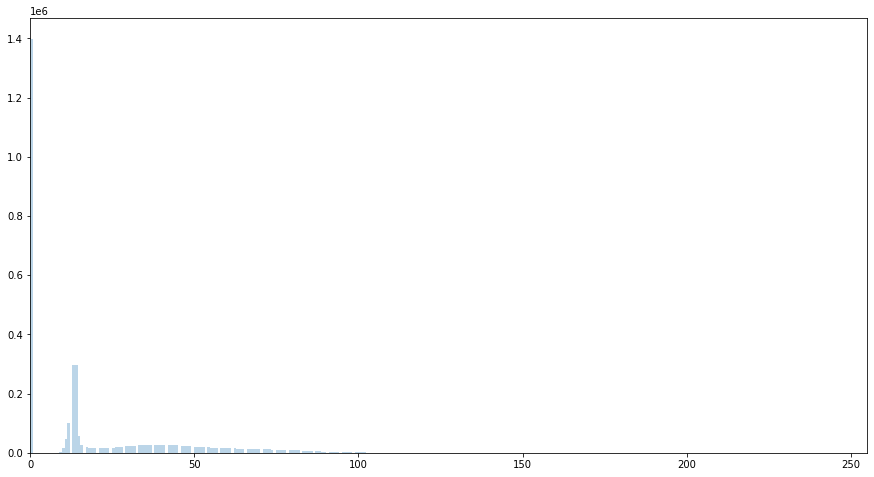

In [109]:
plt.figure(figsize = (15, 8))
plt.hist(test.ravel(), bins = 256, alpha = 0.3)
plt.xlim((0, 255))
plt.show()

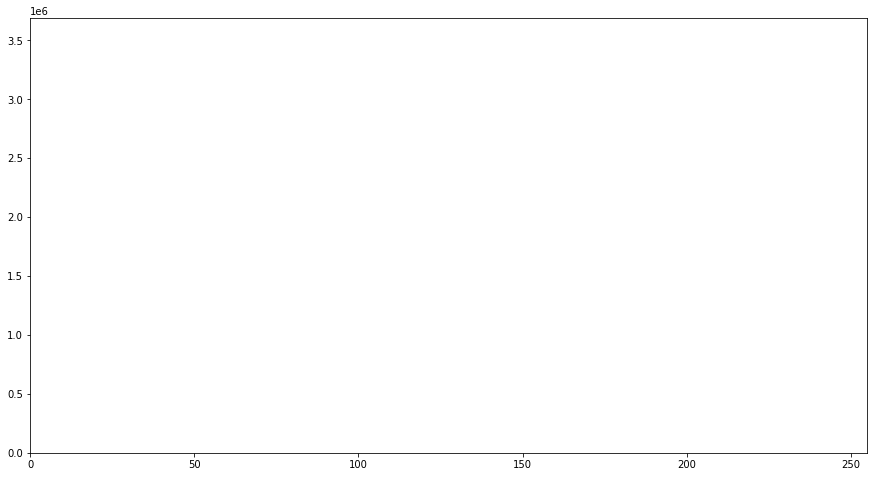

In [113]:
# blankfield = np.where(test < 3)[0]
# test[blankfield] = 0

plt.figure(figsize = (15, 8))
plt.hist(test.ravel(), bins = 256, alpha = 0.3)
plt.xlim((0, 255))
plt.show()

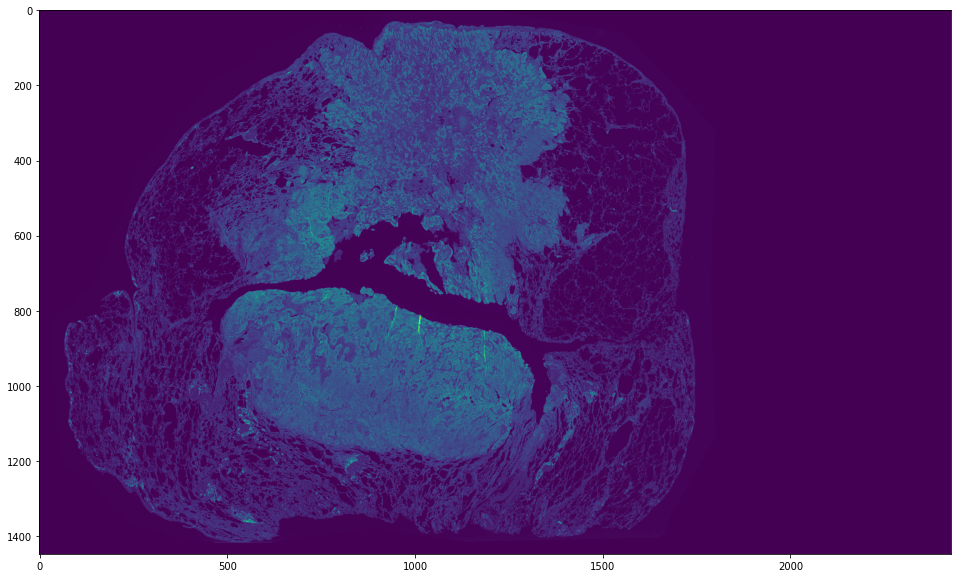

In [96]:
plt.figure(figsize= (20, 10))
plt.imshow(np.clip(test, a_min = 12, a_max = 255))
plt.show()

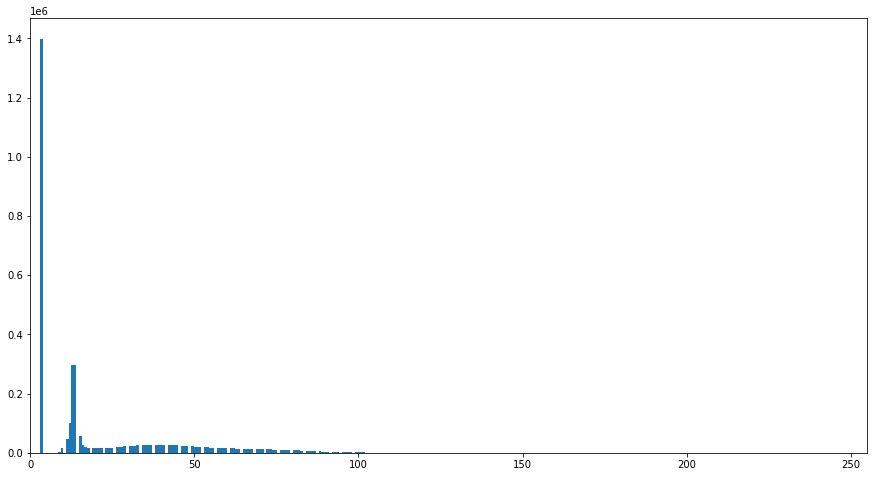

In [111]:
plt.figure(figsize = (15, 8))
plt.hist(np.clip(test, a_min = 3, a_max = 255).ravel(), bins = 256)
plt.xlim((0, 255))
plt.show()

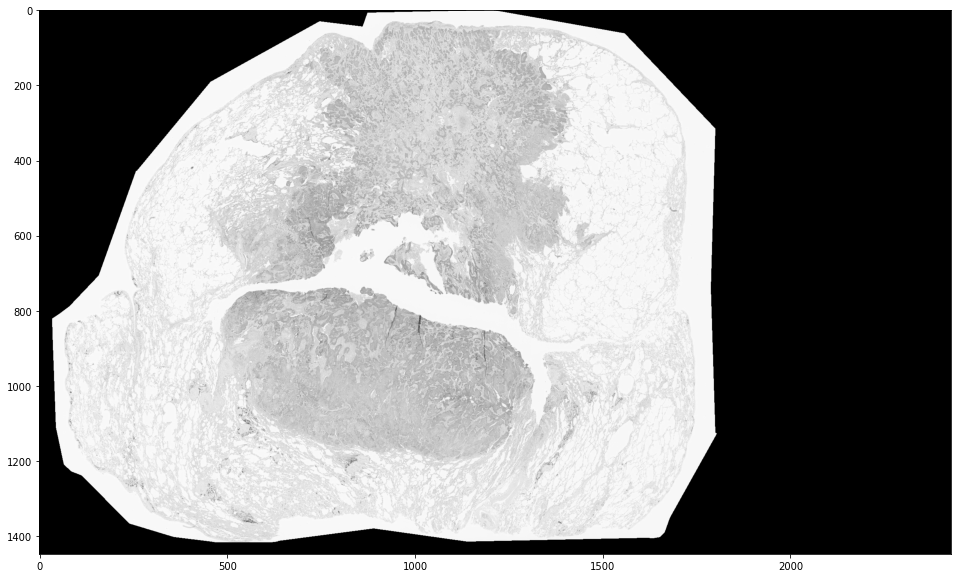

In [83]:
test2 = cv2.subtract(ROI_mask, test)

plt.figure(figsize= (20, 10))
plt.imshow(test2, cmap='gray')
plt.show()

In [60]:
test.shape

(1448, 2427)